In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import ast
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
df_data = pd.read_csv('dataset/ner.csv')
df_data.dropna(inplace=True)
df_data

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
...,...,...,...,...
47954,Sentence: 47955,Indian border security forces are accusing the...,"['JJ', 'NN', 'NN', 'NNS', 'VBP', 'VBG', 'PRP$'...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'B-gpe..."
47955,Sentence: 47956,Indian officials said no one was injured in Sa...,"['JJ', 'NNS', 'VBD', 'DT', 'NN', 'VBD', 'VBN',...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '..."
47956,Sentence: 47957,Two more landed in fields belonging to a nearb...,"['CD', 'JJR', 'VBD', 'IN', 'NNS', 'VBG', 'TO',...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
47957,Sentence: 47958,They say not all of the rockets exploded upon ...,"['PRP', 'VBP', 'RB', 'DT', 'IN', 'DT', 'NNS', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [3]:
def preprocess_data(data):
    for i in range(len(data)):
        pos = ast.literal_eval(data.loc[i, 'POS'])
        tags = ast.literal_eval(data.loc[i, 'Tag'])
        data.loc[i, 'POS'] = [str(word) for word in pos]
        data.loc[i, 'Tag'] = [str(word.upper()) for word in tags]
    return data

In [4]:
df_data = preprocess_data(df_data)
df_data.head()

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[O, O, O, O, O, O, B-GEO, O, O, O, O, O, B-GEO..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"[NNS, IN, NNS, VBN, IN, DT, NN, VBD, DT, NNS, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"[PRP, VBD, IN, DT, NNS, IN, NN, TO, DT, NN, IN...","[O, O, O, O, O, O, O, O, O, O, O, B-GEO, I-GEO..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","[NNS, VBD, DT, NN, IN, NNS, IN, CD, IN, NNS, V...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,Sentence: 5,The protest comes on the eve of the annual con...,"[DT, NN, VBZ, IN, DT, NN, IN, DT, JJ, NN, IN, ...","[O, O, O, O, O, O, O, O, O, O, O, B-GEO, O, O,..."


In [5]:
df_data_fix = df_data[['Sentence','Tag']]
df_data_fix

,Sentence,Tag
0,Thousands of demonstrators have marched throug...,"[O, O, O, O, O, O, B-GEO, O, O, O, O, O, B-GEO..."
1,Families of soldiers killed in the conflict jo...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,They marched from the Houses of Parliament to ...,"[O, O, O, O, O, O, O, O, O, O, O, B-GEO, I-GEO..."
3,"Police put the number of marchers at 10,000 wh...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,The protest comes on the eve of the annual con...,"[O, O, O, O, O, O, O, O, O, O, O, B-GEO, O, O,..."
...,...,...
47954,Indian border security forces are accusing the...,"[B-GPE, O, O, O, O, O, O, B-GPE, O, O, O, O, O..."
47955,Indian officials said no one was injured in Sa...,"[B-GPE, O, O, O, O, O, O, O, B-TIM, O, O, O, O..."
47956,Two more landed in fields belonging to a nearb...,"[O, O, O, O, O, O, O, O, O, O, O]"
47957,They say not all of the rockets exploded upon ...,"[O, O, O, O, O, O, O, O, O, O, O]"


In [39]:
def count_entities(tags, entity):
    count = 0
    for tag in tags:
        if tag == entity:
            count += 1
    return count

def add_entity_tags(tags, entity):
    tags_set = set(tags)
    if "B-" + entity.upper() not in tags_set:
        tags_set.add("B-" + entity.upper())
    if "I-" + entity.upper() not in tags_set:
        tags_set.add("I-" + entity.upper())
    return list(tags_set)

def add_entity_counts(df, entities):
    for entity in entities:
        col_name = f"{entity.upper()}_Count"
        df[col_name] = df["Tag"].apply(lambda x: count_entities(x, entity))
        df["Tag"] = df["Tag"].apply(lambda x: add_entity_tags(x, entity))
        
def plot_entity_counts(df, entities):
    plt.figure(figsize=(10, 6))
    for entity in entities:
        col_name = f"{entity.upper()}_Count"
        plt.bar(entity, df[col_name].sum(), label=entity.upper())
        plt.text(entity, df[col_name].sum(), df[col_name].sum(), ha='center', va='bottom')
    plt.xlabel('Entity')
    plt.ylabel('Total Count')
    plt.title('Total Count of Entities')
    plt.legend()
    plt.show()

In [40]:
entities = ["B-GEO","I-GEO", "B-GPE","I-GPE", "B-ORG","I-ORG","B-PER","I-PER","B-TIM","I-TIM","B-ART","I-ART","B-EVE","I-EVE","B-NAT","I-NAT"]
add_entity_counts(df_data, entities)

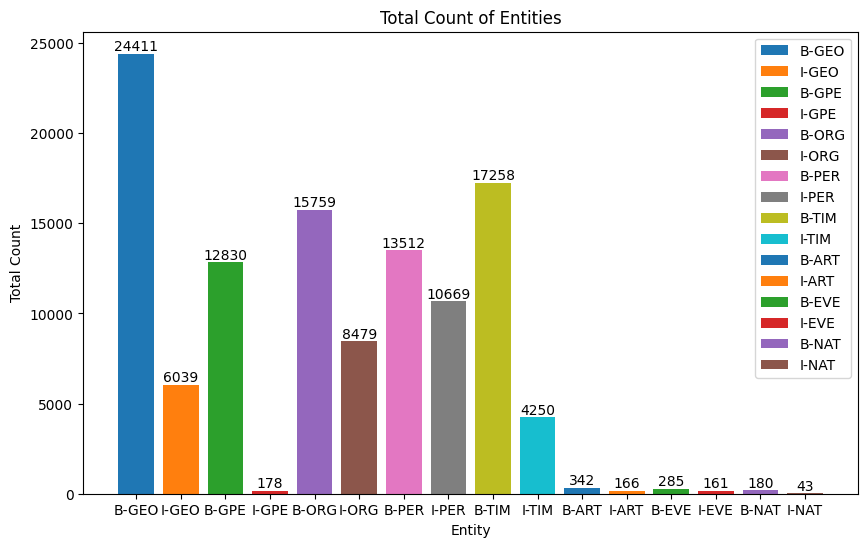

In [41]:
plot_entity_counts(df_data, entities)

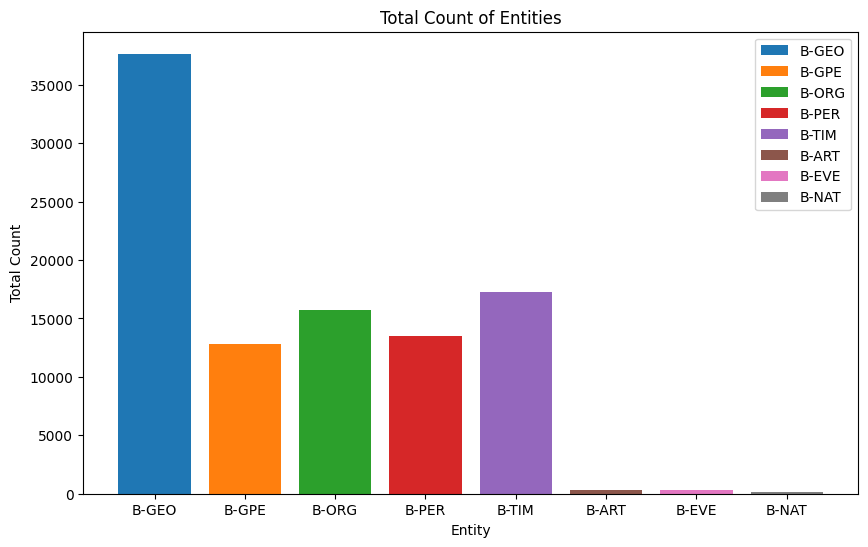

In [9]:
plot_entity_counts(df_data, ["B-GEO","B-GPE","B-ORG","B-PER","B-TIM","B-ART","B-EVE","B-NAT"])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df_data_fix['Sentence'], df_data_fix['Tag'], test_size=0.2, random_state=0)

x_train.shape, x_test.shape

((38367,), (9592,))

In [11]:
EMBEDDING_DIM = 15
X_MAXLEN = max([len(s.split()) for s in x_train])
Y_MAXLEN = max([len(s) for s in y_train])
TRUNCATING = 'post'
PADDING = 'post'
OOV_TOKEN = "<OOV>"

print(X_MAXLEN, Y_MAXLEN)

104 104


In [12]:
x_tokenizer = Tokenizer(oov_token=OOV_TOKEN,lower=False, filters='')
x_tokenizer.fit_on_texts(x_train)

word_index = x_tokenizer.word_index
x_train_seq = x_tokenizer.texts_to_sequences(x_train)
x_train_pad = pad_sequences(x_train_seq, maxlen=X_MAXLEN, truncating=TRUNCATING, padding=PADDING)
x_test_seq = x_tokenizer.texts_to_sequences(x_test)
x_test_pad = pad_sequences(x_test_seq, maxlen=X_MAXLEN, truncating=TRUNCATING, padding=PADDING)

In [13]:
y_tokenizer = Tokenizer(lower=False, filters='')
y_tokenizer.fit_on_texts(y_train)

y_train_seq = y_tokenizer.texts_to_sequences(y_train)
y_train_pad = pad_sequences(y_train_seq, maxlen=Y_MAXLEN, truncating=TRUNCATING, padding=PADDING)
y_test_seq = y_tokenizer.texts_to_sequences(y_test)
y_test_pad = pad_sequences(y_test_seq, maxlen=Y_MAXLEN, truncating=TRUNCATING, padding=PADDING)

In [14]:
NUM_LABELS = len(y_tokenizer.word_index) + 1

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(len(word_index)+1, EMBEDDING_DIM, input_length=X_MAXLEN, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(NUM_LABELS, activation='softmax'))
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 104, 15)           481335    
                                                                 
 bidirectional (Bidirectiona  (None, 104, 128)         40960     
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 104, 18)          2322      
 ibuted)                                                         
                                                                 
Total params: 524,617
Trainable params: 524,617
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(x_train_pad, y_train_pad, epochs=10, batch_size=64, validation_data=(x_test_pad, y_test_pad))

Epoch 1/10
600/600 [==============================] - 19s 19ms/step - loss: 0.1233 - accuracy: 0.8668 - val_loss: 0.0647 - val_accuracy: 0.9015
Epoch 2/10
600/600 [==============================] - 9s 14ms/step - loss: 0.0424 - accuracy: 0.9418 - val_loss: 0.0322 - val_accuracy: 0.9574
Epoch 3/10
600/600 [==============================] - 9s 15ms/step - loss: 0.0250 - accuracy: 0.9662 - val_loss: 0.0271 - val_accuracy: 0.9624
Epoch 4/10
600/600 [==============================] - 8s 14ms/step - loss: 0.0199 - accuracy: 0.9723 - val_loss: 0.0245 - val_accuracy: 0.9657
Epoch 5/10
600/600 [==============================] - 9s 15ms/step - loss: 0.0170 - accuracy: 0.9757 - val_loss: 0.0239 - val_accuracy: 0.9668
Epoch 6/10
600/600 [==============================] - 8s 14ms/step - loss: 0.0150 - accuracy: 0.9782 - val_loss: 0.0242 - val_accuracy: 0.9669
Epoch 7/10
600/600 [==============================] - 8s 14ms/step - loss: 0.0135 - accuracy: 0.9800 - val_loss: 0.0244 - val_accuracy: 0.966

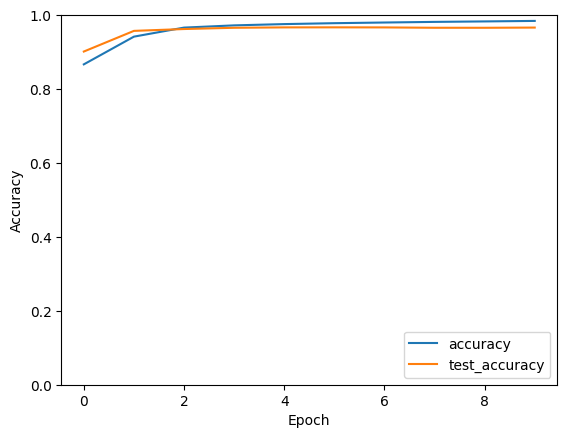

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [64]:
y_pred = model.predict(x_test_pad)
y_pred_labels = np.argmax(y_pred, axis=-1)
y_true_labels = np.squeeze(y_test_pad)

300/300 [==============================] - 2s 5ms/step


In [78]:
def remove_padding_o(y_true, y_pred):
    y_true_no_pad = []
    y_pred_no_pad = []
    for true_seq, pred_seq in zip(y_true, y_pred):
        for true_label, pred_label in zip(true_seq, pred_seq):
            if true_label > 1 and pred_label > 1:
                y_true_no_pad.append(true_label-2)
                y_pred_no_pad.append(pred_label-2)
    return y_true_no_pad, y_pred_no_pad


y_true_no_pad, y_pred_no_pad = remove_padding_o(y_true_labels, y_pred_labels)

df_report = pd.DataFrame(classification_report(y_true_no_pad, y_pred_no_pad, output_dict=True)).transpose()
df_report

d:\Surya\Language Programming\Python\Name-Entity-Recognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Surya\Language Programming\Python\Name-Entity-Recognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Surya\Language Programming\Python\Name-Entity-Recognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

,precision,recall,f1-score,support
0,0.876632,0.914444,0.895139,7048.00000
1,0.966424,0.954144,0.960245,3620.00000
2,0.843788,0.767416,0.803792,3646.00000
3,0.843049,0.920441,0.880047,3268.00000
4,0.848041,0.880982,0.864198,3218.00000
5,0.835929,0.834774,0.835351,2893.00000
6,0.972447,0.929944,0.950721,3226.00000
7,0.835709,0.783404,0.808711,1422.00000
8,0.883225,0.897363,0.890238,1062.00000
9,0.384615,0.100000,0.158730,50.00000


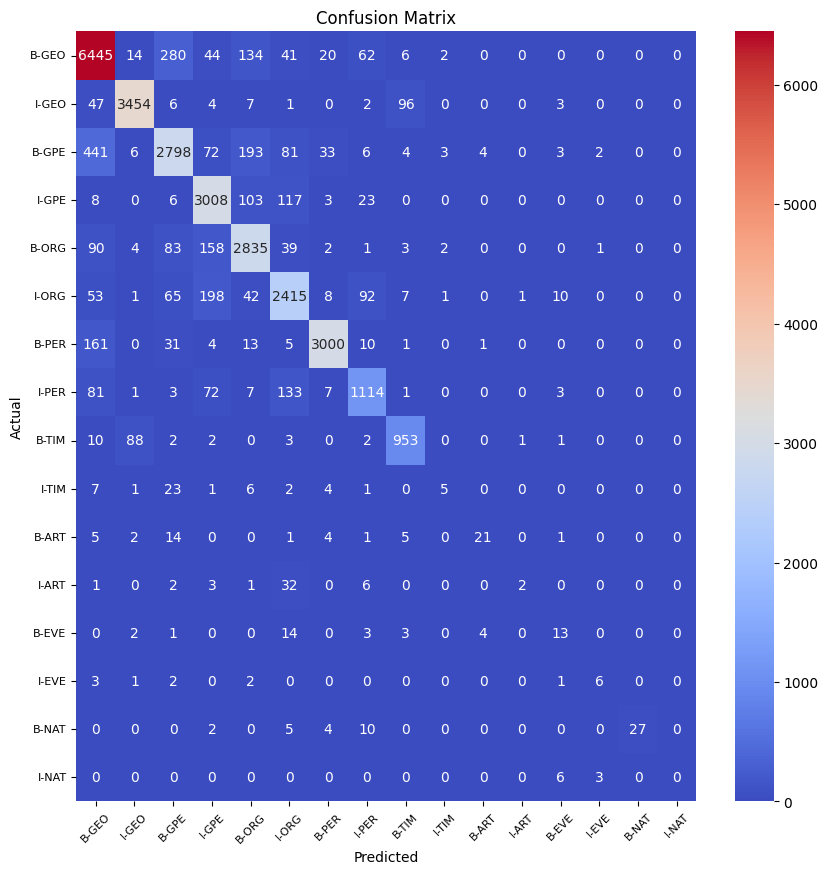

In [76]:
cm = confusion_matrix(y_true_no_pad, y_pred_no_pad)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=entities, yticklabels=entities, cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.title('Confusion Matrix')
plt.show()

In [66]:
# model.save('ner_model.h5')
# with open('x_tokenizer.pickle', 'wb') as handle:
#     pickle.dump(x_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('y_tokenizer.pickle', 'wb') as handle:
#     pickle.dump(y_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)